In [248]:
import numpy as np

In [249]:
import matplotlib.pyplot as plt

In [225]:
class Solver2:
    def __init__(self, N):
        self.lbd= 1e-4
        self.Lx = 1
        self.Ly = 1
        self.time = 1
        self.Nx = N + 1
        self.Ny = N + 1
        self.h = 1/self.Nx
        self.tau = 0.1
        self.cur_time = 0
        self.Nt = int(self.time/self.tau) + 1
        self.matrix = np.zeros([self.Nt, self.Nx, self.Ny])
        self.fill_initials()
    def count_analytical(self, x, y, t):
        return np.cos(np.pi * x) * np.sin(5 * np.pi * y) * np.exp(-50 * np.pi**2 * self.lbd * t)
    def fill_initials(self):
        for i in range(self.Nx):
            x = i*self.h
            for j in range(self.Ny):
                y = j*self.h
                self.matrix[0, i, j] = np.cos(np.pi*x)*np.sin(5*np.pi*y)
        for i in range(self.Ny):
            y = i*self.h
            for j in range(self.Nt):
                self.t = j*self.tau
                self.matrix[j, 0, i] = np.sin(5*np.pi*y)*np.exp(-50*np.pi**2*self.lbd*self.t)
                self.matrix[j, self.Nx - 1, i] = -np.sin(5*np.pi*y)*np.exp(-50*np.pi**2*self.lbd*self.t)
        for i in range(self.Nx):
            x = j*self.h
            for j in range(self.Nt):
                t = j*self.tau
                self.matrix[j, i, 0] = 0
                self.matrix[j, i, self.Ny - 1] = 0
    def solve(self):
        for i in range(self.Nt - 1):
            for j in range(1, self.Ny -1):
                A = np.zeros([self.Nx, self.Nx])
                D = np.zeros(self.Nx)
                A[0, 0] = 1
                A[self.Nx - 1, self.Nx - 1] = 1
                D[0] = self.matrix[i+1, 0, j]
                D[self.Nx - 1] = self.matrix[i+1, self.Nx - 1 , j]
                
                for k in range(1, self.Nx - 1):
                    c = 25*self.lbd*self.tau/self.h**2
                    #print(c, self.lbd, self.tau, self.h)
                    b = 25*self.lbd*self.tau/self.h**2
                    a = -2*c - 2*self.lbd*self.tau/self.h**2- 1
                    d =  - self.lbd*self.tau*(self.matrix[i, k, j - 1] + self.matrix[i, k, j + 1])/self.h**2 - self.matrix[i, k, j]
                    A[k, k - 1] = c
                    A[k, k] = a
                    A[k, k + 1] = b
                    D[k] = d
                    self.A = A
                    self.D = D
                    #print(A)
                self.matrix[i+1, :, j] = np.linalg.solve(A, D)
                
                #print(self.matrix[i+1, :, j])
            if i == self.time // (2 * self.tau):
                er = np.matrix([[np.abs(self.count_analytical(q*self.h, w*self.h, (i+1)*self.tau) - self.matrix[i+1, q, w]) for q in range(self.Nx)] for w in range(self.Ny)])
                self.ern = np.amax(er)

In [229]:
er_ar = []
for N in [10, 20, 50, 100, 500, 1000]:
    print(N)
    s = Solver2(N)
    s.solve()
    er_ar.append(s.ern)
    print(er_ar)

10
[0.9656974188316969]
20
[0.9656974188316969, 0.6635955026159954]
50
[0.9656974188316969, 0.6635955026159954, 0.2957642080844213]
100
[0.9656974188316969, 0.6635955026159954, 0.2957642080844213, 0.15112298691996182]
500
[0.9656974188316969, 0.6635955026159954, 0.2957642080844213, 0.15112298691996182, 0.030584065022063074]
1000
[0.9656974188316969, 0.6635955026159954, 0.2957642080844213, 0.15112298691996182, 0.030584065022063074, 0.023027876320705354]


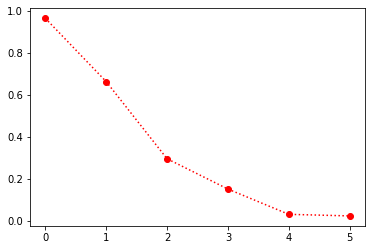

In [246]:
data = er_ar
x_data = [i for i in range(len(er_ar))]
fig1, ax1 = plt.subplots(1)
#plt.title('density')
plt.plot(x_data, data, 'o:r') 

In [254]:
data2 = [np.log(i) for i in data]
x_data2 = [np.log(i) for i in [10, 20, 50, 100, 500, 1000]]

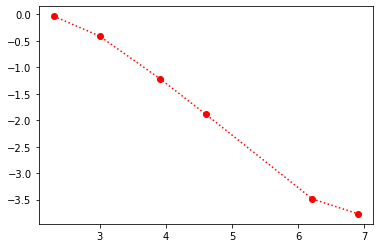

In [255]:

plt.plot(x_data2, data2, 'o:r') 

In [257]:
(data2[5] - data[0])/(x_data[5] - x_data[0])

-0.9473494403673876